In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

a = 0.00213108
b = 6.44547
y0 = -3.02324


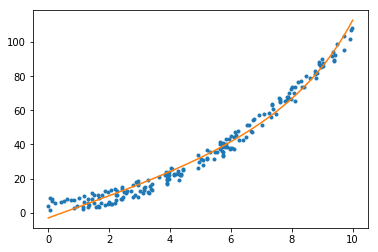

In [5]:
def f(y, t, a, b):
    return a*y**2 + b

def y(t, a, b, y0):
    """
    Solution to the ODE y'(t) = f(t,y,a,b) with initial condition y(0) = y0
    """
    y = odeint(f, y0, t, args=(a, b))
    return y.ravel()

# Some random data to fit
data_t = np.sort(np.random.rand(200) * 10)
data_y = data_t**2 + np.random.rand(200)*10

popt, cov = curve_fit(y, data_t, data_y, [-1.2, 0.1, 0])
a_opt, b_opt, y0_opt = popt

print("a = %g" % a_opt)
print("b = %g" % b_opt)
print("y0 = %g" % y0_opt)

t = np.linspace(0, 10, 2000)
plt.plot(data_t, data_y, '.',
         t, y(t, a_opt, b_opt, y0_opt), '-')
# plt.gcf().set_size_inches(6, 4)
# plt.savefig('out.png', dpi=96)
# plt.show()